In [1]:
from PIL import Image, ImageDraw
import pydicom

from fastai.data.all import *

In [2]:
def get_dicom_files(path, recurse=True, folders=None):
    "Get dicom files in `path` recursively, only in `folders`, if specified."
    return get_files(path, extensions=[".dcm",".dicom"], recurse=recurse, folders=folders)

In [19]:
in_path = Path('src')
out_path = Path('/media/veracrypt1/Data Science/SIIM-Imgs/png')

stage = 'train'

In [4]:
df = pd.read_pickle(in_path / 'train_ready.pkl')

In [5]:
df.head(2)

id StudyInstanceUID  Negative for Pneumonia  \
0  000a312787f2.dcm     5776db0cec75                       0   
1  000c3a3f293f.dcm     ff0879eb20ed                       1   

   Typical Appearance  Indeterminate Appearance  Atypical Appearance  \
0                   1                         0                    0   
1                   0                         0                    0   

                                                                                         boxes_list  \
0  [[789.28836, 582.43035, 1815.94498, 2499.73327], [2245.91208, 591.20528, 3340.5737, 2352.75472]]   
1                                                                            [[0.0, 0.0, 1.0, 1.0]]   

          labels_list     label  \
0  [Typical, Typical]   Typical   
1          [Negative]  Negative   

                                                                resized_boxes  \
0  [[189.904, 140.134, 436.919, 601.44], [540.37, 142.245, 803.747, 566.076]]   
1                                                      [[0.0, 0.0, 1.0, 1.0]]   

     scalar  
0  0.240602  
1       NaN

In [7]:
filenames = get_dicom_files(in_path / stage)

In [8]:
fn = filenames[0]

In [15]:
arr = pydicom.read_file(fn).pixel_array
img = Image.fromarray((arr/arr.max() * 255).astype(np.uint8))

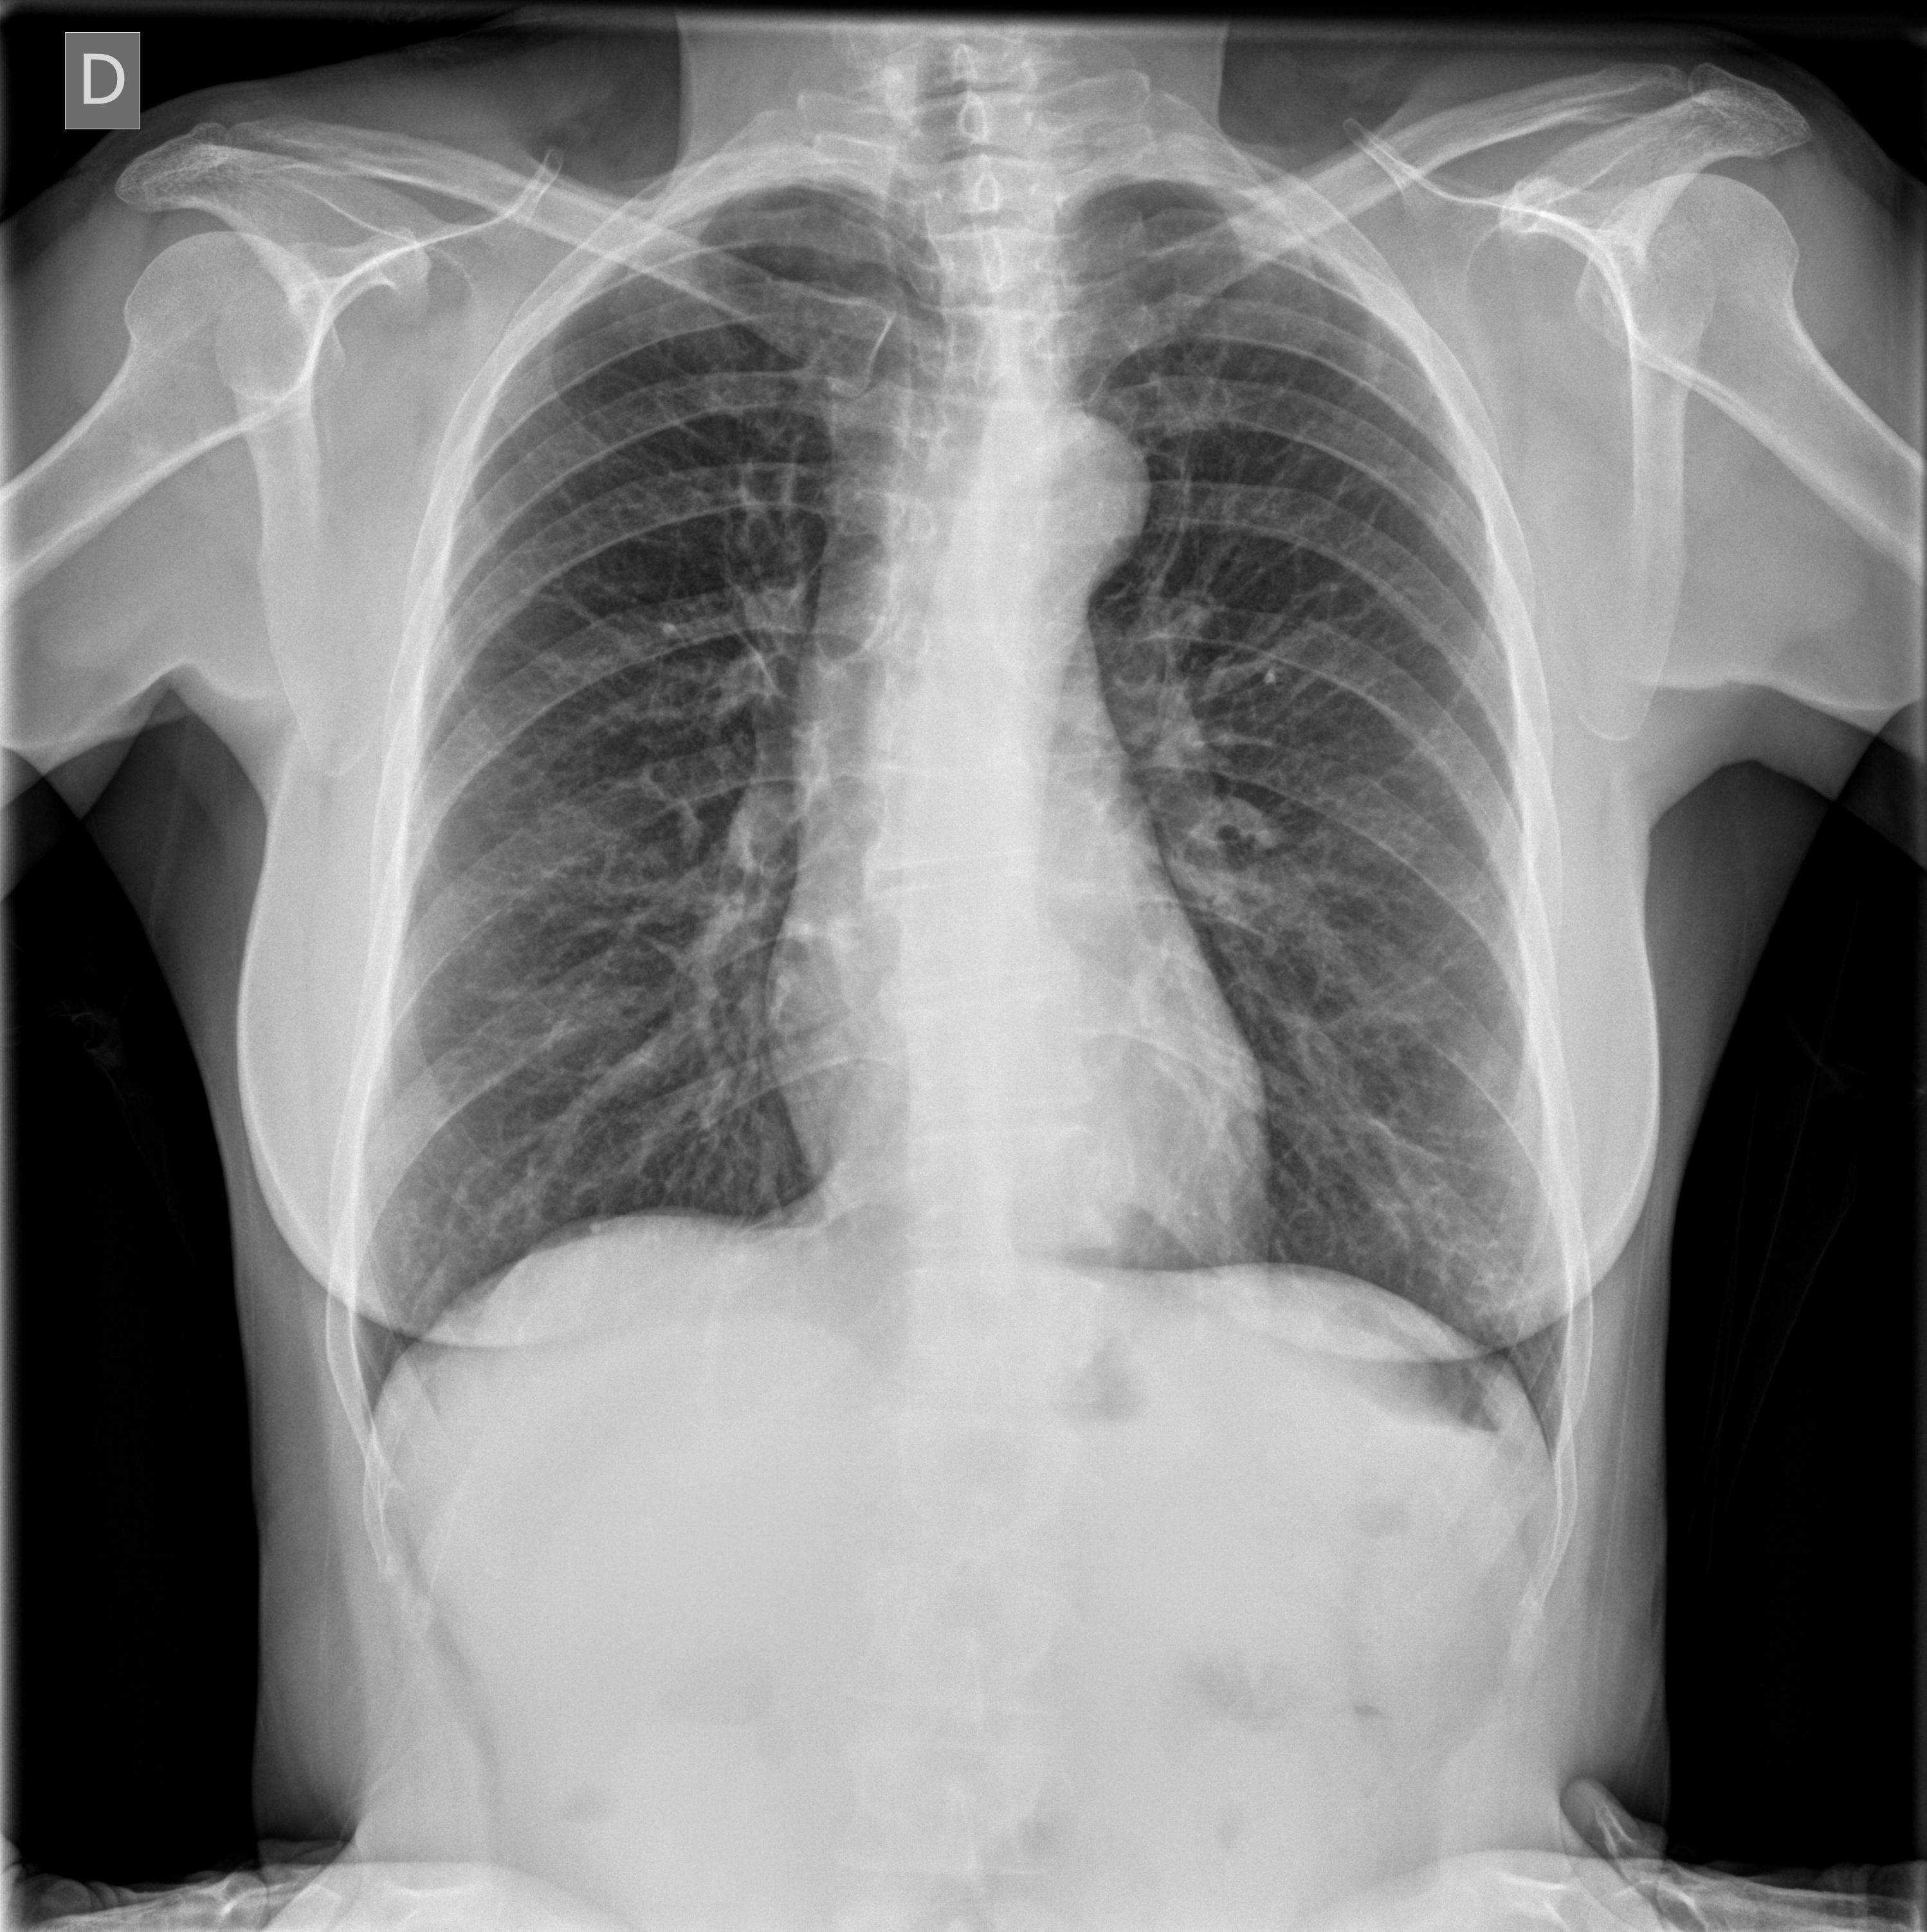

In [16]:
img

In [24]:
def get_scalar(fn):
    return df.loc[df['id'] == fn.name, 'scalar'].values[0]

In [25]:
get_scalar(fn)

0.3417890520694259

In [29]:
resized_img.size

(1024, 1026)

In [73]:
#### 
resized_img.mode

'L'

In [62]:
scalar = get_scalar(fn)
resized_img = img.resize((1024,int(img.height * scalar)), resample = Image.LANCZOS)

out_fn = Path(*fn.parts[1:])
folder_struct = out_fn.parent
(out_path / folder_struct).mkdir(exist_ok = True, parents = True)

resized_img.save((out_path / out_fn).with_suffix('.png'))

In [74]:
train_files = get_dicom_files(in_path / 'train')
m = len(train_files)
print(m)
for i,fn in enumerate(train_files):
    print(f'{(i / (m-1) * 100):5.2f}%', end='\r')
    scalar = get_scalar(fn)
    
    arr = pydicom.read_file(fn).pixel_array
    img = Image.fromarray((arr/arr.max() * 255).astype(np.uint8))
    resized_img = img.resize((1024,int(img.height * scalar)), resample = Image.LANCZOS).convert('RGB')

    out_fn = Path(*fn.parts[1:])
    folder_struct = out_fn.parent
    (out_path / folder_struct).mkdir(exist_ok = True, parents = True)

    resized_img.save((out_path / out_fn).with_suffix('.png'))

6334


/home/karrrrrrrr/miniconda3/envs/fastmed/lib/python3.9/site-packages/pydicom/pixel_data_handlers/numpy_handler.py:341: UserWarning: The length of the pixel data in the dataset (13262360 bytes) indicates it contains excess padding. 216296 bytes will be removed from the end of the data
  warnings.warn(msg)


In [75]:
new_imgs = get_files(out_path)

In [76]:
assert(len(new_imgs) == len(filenames))